<a href="https://colab.research.google.com/github/Krishnathombare/Image-classification/blob/main/Images_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Define the paths
zip_file_path = '/content/DL.zip'
extract_path = '/content/DL.zip'

# Extract the zip file
try:
    with zipfile.ZipFile('/content/DL.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/DL.zip')
    print(f"Files extracted to: {'/content/DL.zip'}")
except FileNotFoundError:
    print(f"File not found: {'/content/DL.zip'}")
except zipfile.BadZipFile:
    print(f"Error: The file is not a zip file or it is corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")

# Verify extraction
try:
    extracted_files = os.listdir('/content/DL.zip')
    print(f"Extracted files: {'/content/DL.zip'}")
except FileNotFoundError:
    print(f"Directory not found: {'/content/DL.zip'}")
except Exception as e:
    print(f"An error occurred while listing files: {e}")


Error: The file is not a zip file or it is corrupted.
An error occurred while listing files: [Errno 20] Not a directory: '/content/DL.zip'


In [ ]:
import zipfile

# Define the path to the uploaded zip file
zip_file_path = '/content/DL.zip'


extract_path = '/mnt'

# Extract the zip file
with zipfile.ZipFile('/content/DL.zip', 'r') as zip_ref:
    zip_ref.extractall('/mnt')

print(f"Files extracted to: {'/mnt'}")

# Verify extraction
import os
extracted_files = os.listdir(extract_path)
print(f"Extracted files: {extracted_files}")


BadZipFile: File is not a zip file

In [ ]:
import numpy as np
import os
import random
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import glob as gb
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
train_path = "/mnt/seg_train/"
test_path = "/mnt/seg_test/"
pred_path = "/mnt/seg_pred/"

In [ ]:
for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + "/*.jpg")
    print(f"for training data, found {len(files)} in folder {folder}")

for training data, found 2382 in folder street
for training data, found 2191 in folder buildings
for training data, found 2512 in folder mountain
for training data, found 2274 in folder sea
for training data, found 2404 in folder glacier
for training data, found 2271 in folder forest


In [ ]:
for folder in os.listdir(test_path):
  files = gb.glob(pathname=str(test_path) + folder + "/*.jpg")
  print(f"for test data, found {len(files)} in folder {folder}")

for test data, found 501 in folder street
for test data, found 437 in folder buildings
for test data, found 525 in folder mountain
for test data, found 510 in folder sea
for test data, found 553 in folder glacier
for test data, found 474 in folder forest


In [ ]:
files = gb.glob(pathname=str(pred_path) + "/*.jpg")
print(f"for training data, found {len(files)}")

for training data, found 7301


In [ ]:
size = []
for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + "/*.jpg")
    for file in tqdm(files):
        img = plt.imread(file)
        size.append(img.shape)

100%|██████████| 2271/2271 [00:01<00:00, 1469.20it/s]


In [ ]:
pd.Series(size).value_counts()

,count
"(150, 150, 3)",13986
"(113, 150, 3)",7
"(111, 150, 3)",3
"(135, 150, 3)",3
"(123, 150, 3)",2
"(108, 150, 3)",2
"(142, 150, 3)",2
"(136, 150, 3)",2
"(146, 150, 3)",2
"(143, 150, 3)",2


In [ ]:
test_size = []
for folder in os.listdir(test_path):
    files = gb.glob(pathname=str(test_path) + folder + "/*.jpg")
    for file in tqdm(files):
        img = plt.imread(file)
        test_size.append(img.shape)

100%|██████████| 474/474 [00:00<00:00, 944.70it/s]


In [ ]:
pd.Series(test_size).value_counts()

,count
"(150, 150, 3)",2993
"(81, 150, 3)",1
"(131, 150, 3)",1
"(110, 150, 3)",1
"(76, 150, 3)",1
"(149, 150, 3)",1
"(72, 150, 3)",1
"(141, 150, 3)",1


In [ ]:
pred_size = []
files = gb.glob(pathname=str(pred_path) + "/*.jpg")
for file in tqdm(files):
    img = plt.imread(file)
    pred_size.append(img.shape)

100%|██████████| 7301/7301 [00:04<00:00, 1625.94it/s]


In [ ]:
pd.Series(pred_size).value_counts()

,count
"(150, 150, 3)",7288
"(112, 150, 3)",1
"(374, 500, 3)",1
"(124, 150, 3)",1
"(149, 150, 3)",1
"(143, 150, 3)",1
"(139, 150, 3)",1
"(131, 150, 3)",1
"(100, 150, 3)",1
"(144, 150, 3)",1


we choose 150 x 150 for image size
encode and decode image labels

In [ ]:
encode = {"buildings": 0, "forest": 1, "glacier": 2, "mountain": 3, "sea": 4, "street": 5}
decode = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
IMG_SIZE = (150, 150)
n_classes = len(encode)

Loading of data function


In [ ]:
def load_data(train_path, test_path):
    train_images = []
    train_labels = []
    for folder in os.listdir(train_path):
        label = encode[folder]
        for file in tqdm(os.listdir(os.path.join(train_path, folder))):
            img_path = os.path.join(os.path.join(train_path, folder), file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            train_images.append(img)
            train_labels.append(label)
    test_images = []
    test_labels = []
    for folder in os.listdir(test_path):
        label = encode[folder]
        for file in tqdm(os.listdir(os.path.join(test_path, folder))):
            img_path = os.path.join(os.path.join(test_path, folder), file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            test_images.append(img)
            test_labels.append(label)
    train_images = np.array(train_images, dtype="float32")
    train_labels = np.array(train_labels, dtype="int32")
    test_images = np.array(test_images, dtype="float32")
    test_labels = np.array(test_labels, dtype="int32")
    return train_images, train_labels, test_images, test_labels

In [ ]:
X_train, y_train, X_test, y_test = load_data(train_path, test_path)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

100%|██████████| 474/474 [00:00<00:00, 695.36it/s]


((14034, 150, 150, 3), (14034,), (3000, 150, 150, 3), (3000,))

Visualize some random samples

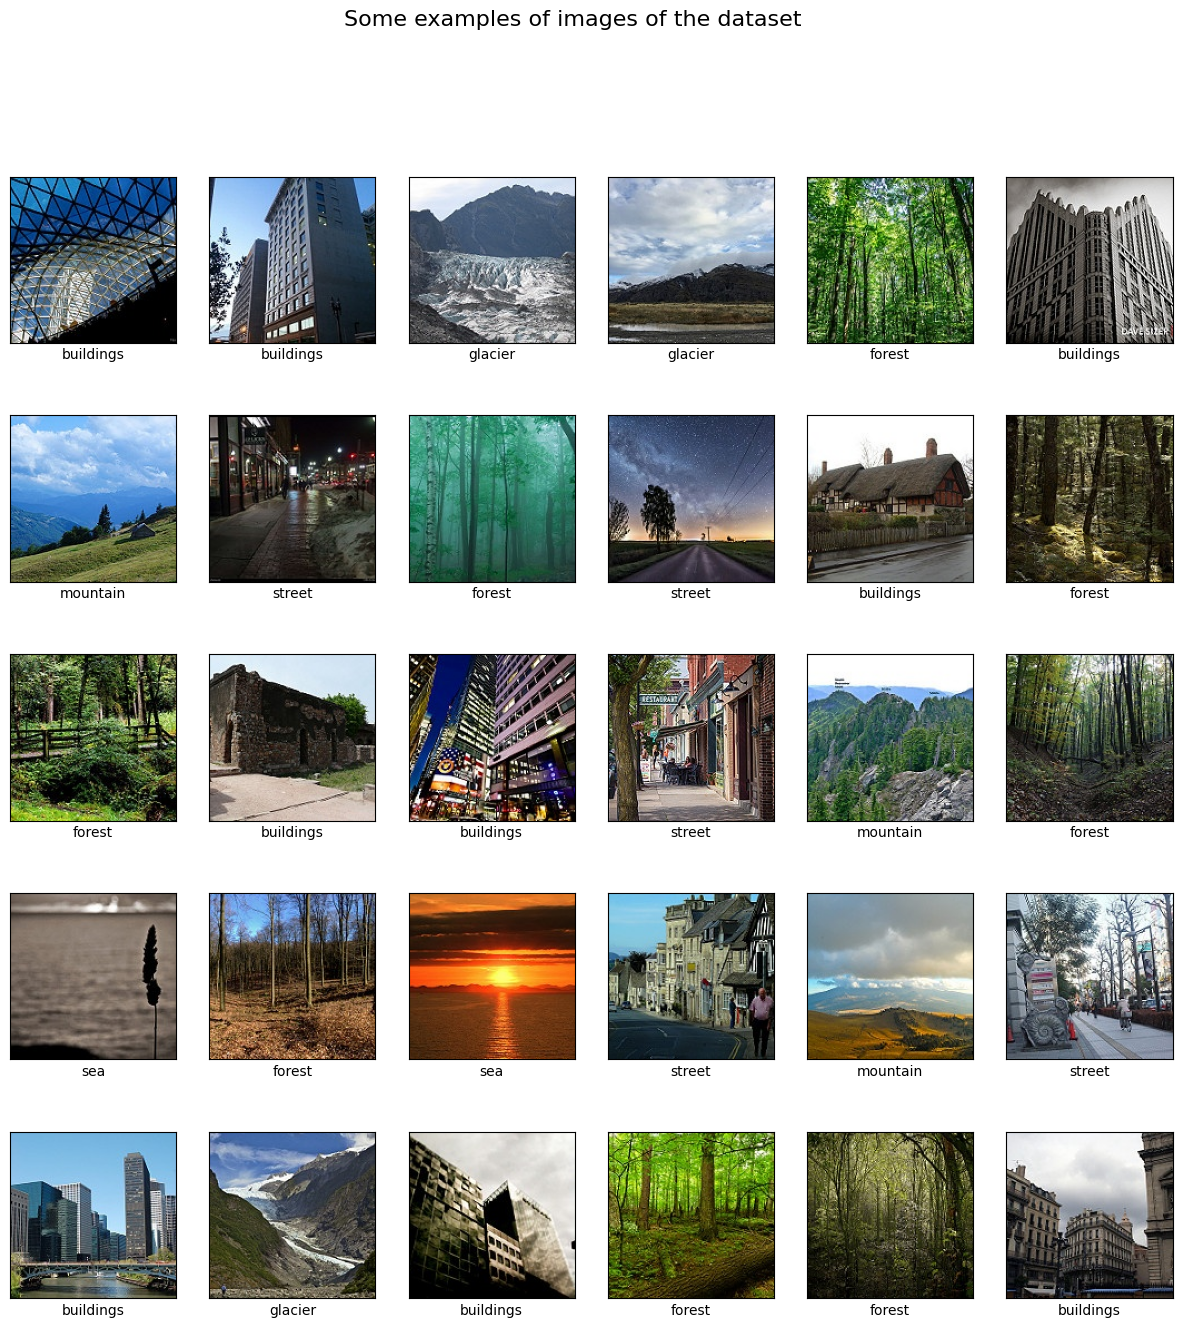

In [ ]:
def display_examples(images, labels):
    fig = plt.figure(figsize=(15,15))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    x = 1
    idx = np.random.choice(images.shape[0], 30, replace = False)
    for i in idx:
        plt.subplot(5,6,x)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i] / 255, cmap=plt.cm.binary)
        plt.xlabel(decode[labels[i]])
        x += 1
    plt.show()
display_examples(X_train, y_train)

In [ ]:
idx = np.random.permutation(X_train.shape[0])
X_train = X_train[idx]
y_train = y_train[idx]
iddx = np.random.permutation(X_test.shape[0])
X_test = X_test[iddx]
y_test = y_test[iddx]

Normalization

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

CNN Models

In [ ]:
cnn_model = tf.keras.Sequential(
    [
        # Convolutional Layer 1
        Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        # Convolutional Layer 2
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # Convolutional Layer 3
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        # Flatten Layer
        Flatten(),
        # Fully Connected Layer 1
        Dense(128, activation="relu"),
        Dropout(0.5),  # Dropout layer to prevent overfitting
        # Output Layer
        Dense(
            n_classes, activation="softmax"
        ),  # num_classes should be the number of classes in your dataset
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_hist = cnn_model.fit(
    X_train, y_train, epochs=20, batch_size=64, validation_split=0.2
)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - accuracy: 0.4280 - loss: 1.4742 - val_accuracy: 0.6373 - val_loss: 0.9358
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.6461 - loss: 0.9420 - val_accuracy: 0.7659 - val_loss: 0.6658
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.7286 - loss: 0.7442 - val_accuracy: 0.7581 - val_loss: 0.6510
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 620s 3s/step - accuracy: 0.7670 - loss: 0.6525 - val_accuracy: 0.7930 - val_loss: 0.5825
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.8050 - loss: 0.5512 - val_accuracy: 0.8005 - val_loss: 0.5500
Epoch 6/20
175/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8303 - loss: 0.4854

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_hist.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_hist.history['loss'], label='Train Loss')
plt.plot(cnn_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.show()

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("Loss = " , loss)
print("Accuracy = ", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)